# Assignment 2: Linear Regression

## Janelle Domantay   
## Dylan Obata

## Dataset and Source
For our project, we used The Complete Pokemon Dataset found on Kaggle. https://www.kaggle.com/rounakbanik/pokemon

## Characteristics
Our dataset has 13 features, consisting of:
* 6 Categorical Features (#, Name, Type 1, Type 2, Generation, and Legendary)
* 7 Quantatative Features (Total, HP, Attack, Defense, Sp. Atk, Sp Def. Defense, and Speed)

In [107]:
import pandas as pd #data analysis library
import matplotlib.pyplot as plt #graphing
import seaborn as sns #graphing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn import metrics
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

poke_df = pd.read_csv("Pokemon.csv")
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Data Preprocessing
In order to apply regression, we had to remove the categorical data features 
* #
* Name
* Type 1
* Type 2
* Generation
* Legendary

Additionally, we removed the quantatative features 
* Special Attack
* Special Defense

In order to reduce the dimensionality of our data.

In [108]:
poke_stats = ['HP', "Attack", "Defense", "Speed"]
poke_df = poke_df.drop(columns = ['#','Name', 'Type 1', 'Type 2', 'Total', 'Sp. Atk', 'Sp. Def', 'Generation', "Legendary"])
poke_df.head()

,HP,Attack,Defense,Speed
0,45,49,49,45
1,60,62,63,60
2,80,82,83,80
3,80,100,123,80
4,39,52,43,65


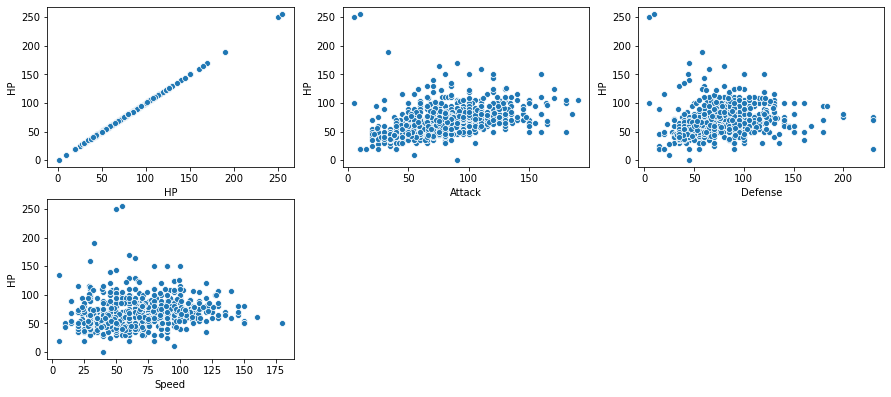

In [109]:
plt.figure(figsize = (15,10)) #horizontal & vertical size in inches
for i in enumerate(poke_stats):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=poke_df, x=i[1], y = 'HP')

In [110]:
#preprocessing independent variables
x = poke_df.iloc[:,1:4] 
atk = poke_df.iloc[:,1]
dfs = poke_df.iloc[:,2]
spd = poke_df.iloc[:,3]
x

,Attack,Defense,Speed
0,49,49,45
1,62,63,60
2,82,83,80
3,100,123,80
4,52,43,65
...,...,...,...
795,100,150,50
796,160,110,110
797,110,60,70
798,160,60,80


In [111]:
#preprocessing dependent variables
y = poke_df.iloc[:,0]
print(y)

0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64


In [112]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2) #20% testing

# Linear Regression with Ordinary Least Squares

**For the Ordinary Least Squares Model, we had to add the constant term parameter vector.**

In [113]:
x_trainnc = x_train
x_train = sm.add_constant(x_train) #add constant term

## Results for Ordinary Least Square Model
After running the OLS model on our dataset we see that the linear equation that best fits our data is given by

$\hat{w} = 0.2940x_1 + 0.0421x_2 + 0.0089x_3 + 37.2368$

where the bias is 37.2368.

We also provide relevant metrics:
* $r^2=0.16$
* Absolute Error for Training Set = 15.291428398303669
* Mean Square Error for Training Set = 534.7590917537507
* Root Mean Square Error for Training Set = 23.12485874019019

* Absolute Error for Test Set = 16.501750718281876
* Mean Square Error for Test Set = 719.8984189650921
* Root Mean Square Error for Test Set = 26.830922812402335

Our low $r^2$ value shows that the data was not well modeled by linear regression.

In [114]:
result = sm.OLS(y_train, x_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     39.10
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           3.37e-23
Time:                        15:04:19   Log-Likelihood:                -2942.7
No. Observations:                 640   AIC:                             5893.
Df Residuals:                     636   BIC:                             5911.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.3340      3.335     12.694      0.000      35.785      48.883
Attack         0.2806      0.035      7.993      0.000       0.212       0.350
Defense        0.0573      0.034      1.684      0.093      -0.010       0.124
Speed          0.0192      0.036      0.535      0.593      -0.051       0.090
==============================================================================
Omnibus:                      449.316   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9798.073
Skew:                           2.818   Prob(JB):                         0.00
Kurtosis:                      21.321   Cond. No.                         470.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

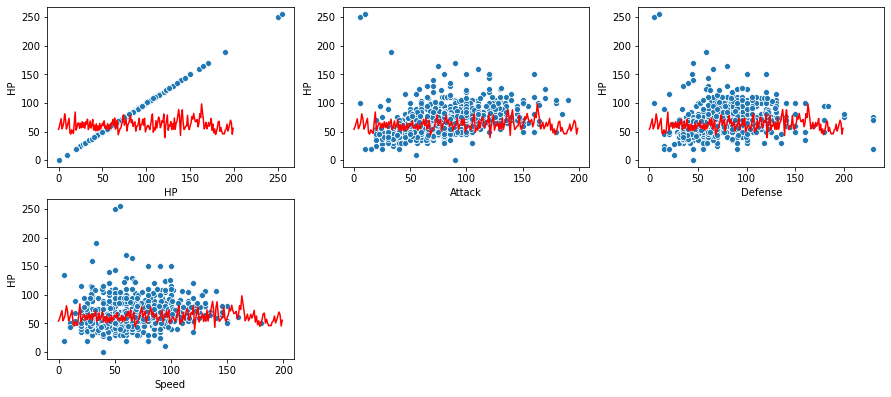

In [115]:
plt.figure(figsize = (15,10)) #horizontal & vertical size in inches
for i in enumerate(poke_stats):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=poke_df, x=i[1], y = 'HP')
    px = np.arange(0,200,1)
    bias = 37.2368
    py = (0.2940 * atk[px]) + (.0421 * dfs[px]) + (.0089*spd[px]) + bias
    plt.plot(py, 'r')
    plt.show
    
#g(x) = 0.2940*x_1 + 0.0421*x_2 + 0.0089*x_3 + 37.2368

In [116]:
ypred = result.predict(x_train)
print("The Absoulte Error for the Training set is", 
    metrics.mean_absolute_error(y_train, ypred)) #Absolute error

print("The Mean Squared Error for the Training set is", 
      metrics.mean_squared_error(y_train, ypred)) #MSE

print("The Root Mean Squared Error for the Training set is",
      np.sqrt(metrics.mean_squared_error(y_train,ypred))) #RMSE

The Absoulte Error for the Training set is 16.03156696826443
The Mean Squared Error for the Training set is 577.1423477410721
The Root Mean Squared Error for the Training set is 24.023787123205036


In [117]:
x_testnc = x_test #no constant
x_test = sm.add_constant(x_test)
ypred = result.predict(x_test)
print(ypred)
print(y_test)

26     62.231683
417    72.048203
733    52.501014
747    62.151001
526    82.669447
         ...    
799    81.419510
202    55.405686
150    67.387104
268    98.311453
406    67.776727
Length: 160, dtype: float64
26      40
417     80
733     45
747     74
526     68
      ... 
799     80
202     35
150     70
268    100
406     45
Name: HP, Length: 160, dtype: int64


In [118]:
#calculating errors
print("The Absolute Error for the Test set is"
      ,metrics.mean_absolute_error(y_test, ypred))#Absolute error
print("The Mean Squared Error for the Test set is",
      metrics.mean_squared_error(y_test, ypred))#MSE
print("The Root Mean Squared Error for the Test set is",
      np.sqrt(metrics.mean_squared_error(y_test,ypred)))

The Absolute Error for the Test set is 14.451760912309208
The Mean Squared Error for the Test set is 357.7482842486264
The Root Mean Squared Error for the Test set is 18.914234963345105


# Linear Regression with Gradient Descent

In [119]:
#gradient descent
sgdr = SGDRegressor(max_iter = 1000,penalty = "elasticnet",loss = 'huber',tol = 1e-3, average = True, learning_rate = 'constant')
sgdr.fit(x_trainnc, y_train)

SGDRegressor(average=True, learning_rate='constant', loss='huber',
             penalty='elasticnet')

## Results for Linear Regression with Gradient Descent

After running the LR with Gradient Descent model on our dataset we see that the linear equation that best fits our data is given by

$\hat{w} =  0.36384525x_1 + 0.27076375x_2 + 0.25237602x_3 + 0.29716996$

where the bias is 0.29716996.


We also provide relevant metrics:
* Mean Absolute Error for the Training set is 16.58126437534663
* Mean Squared Error for the Training set is 678.9338650222622
* Root Mean Squared Error for the Training set is 26.05635939693537
* Mean Absolute Error for the Test set is 15.120392095929683
* Mean Squared Error for the Test set is 569.9625798593513
* Root Mean Squared Error for the Test set is 23.873889081156243


Iterations until Convergence: 7

Learning Rate: 0.01


In [120]:
lgpred = sgdr.predict(x_testnc)
print(lgpred)

[ 46.29936281  80.59275732  32.89855235  63.5211758   82.50751617
  46.73989033  80.98980707  36.50739594  64.33261678  53.5018178
  43.15393165  40.92305157  94.75665392  73.78415032 106.12238708
  61.83039207  86.85785983  62.96993509  61.65360608  82.94007199
  80.80546761  47.66467127  85.68338571  56.01837287  77.73290189
  50.06105677  80.46260123  87.233266    31.17088498  91.69292476
  60.60957315  65.94015633  56.49363299  40.68854883  46.67090088
  63.14146753  74.65340731  51.85901243  43.40855153  55.52982524
  88.89398784  71.57863304  53.8282524   98.0277902   47.7408716
  66.31771355  28.28656858  62.74416966  69.65522039  54.91618921
  70.40111392  38.82495434  76.94889126  56.53448398  47.99062227
  52.60035575  47.30679721 106.95671297  82.99989804  45.20592433
  18.92279794  76.78811094  44.46605783  73.2449558   84.40055582
  91.17332201  68.51882949 122.10732586  56.6677922   86.31058648
  38.21839605  59.07660823  77.22523821  52.7374407   72.54163821
 100.3178796

In [121]:
metrics.r2_score(y_test, lgpred)

0.203407257304137

IndexError: index 3 is out of bounds for axis 0 with size 3

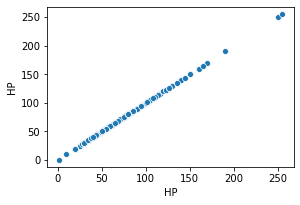

In [122]:
plt.figure(figsize = (15,10)) #horizontal & vertical size in inches
for i in enumerate(poke_stats):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=poke_df, x=i[1], y = 'HP')
    px = np.arange(0,200,1)
    bias = 20
    py = (sgdr.coef_[1] * atk[px]) + (sgdr.coef_[2] * dfs[px]) + (sgdr.coef_[3]*spd[px]) + sgdr.intercept_
    plt.plot(py, 'r')
    plt.show
    
#g(x) = 0.36384525*x_1 + 0.27076375*x_2 + 0.25237602*x_3 + 0.29716996

In [123]:
#print GD 
#print("Average Intercept ", sgdr.average_intercept_)
print("Intercept: ", sgdr.intercept_)
print("Iterations until Convergence: ", sgdr.n_iter_)
print("Learning Rate: 0.01")

Intercept:  [0.29374091]
Iterations until Convergence:  11
Learning Rate: 0.01


In [124]:
lgpred = sgdr.predict(x_trainnc)
print("The Mean Absolute Error for the Training set is",
      metrics.mean_absolute_error(y_train, lgpred)) #Absolute error
print("The Mean Squared Error for the Training set is", 
      metrics.mean_squared_error(y_train, lgpred)) #MSE
print("The Root Mean Squared Error for the Training set is",
      np.sqrt(metrics.mean_squared_error(y_train,lgpred))) #RMSE

The Mean Absolute Error for the Training set is 17.016109527976706
The Mean Squared Error for the Training set is 723.5081075860065
The Root Mean Squared Error for the Training set is 26.89810602228355


In [125]:
lgpred = sgdr.predict(x_testnc)
print(lgpred)

[ 46.29936281  80.59275732  32.89855235  63.5211758   82.50751617
  46.73989033  80.98980707  36.50739594  64.33261678  53.5018178
  43.15393165  40.92305157  94.75665392  73.78415032 106.12238708
  61.83039207  86.85785983  62.96993509  61.65360608  82.94007199
  80.80546761  47.66467127  85.68338571  56.01837287  77.73290189
  50.06105677  80.46260123  87.233266    31.17088498  91.69292476
  60.60957315  65.94015633  56.49363299  40.68854883  46.67090088
  63.14146753  74.65340731  51.85901243  43.40855153  55.52982524
  88.89398784  71.57863304  53.8282524   98.0277902   47.7408716
  66.31771355  28.28656858  62.74416966  69.65522039  54.91618921
  70.40111392  38.82495434  76.94889126  56.53448398  47.99062227
  52.60035575  47.30679721 106.95671297  82.99989804  45.20592433
  18.92279794  76.78811094  44.46605783  73.2449558   84.40055582
  91.17332201  68.51882949 122.10732586  56.6677922   86.31058648
  38.21839605  59.07660823  77.22523821  52.7374407   72.54163821
 100.3178796

In [126]:
print("The Mean Absolute Error for the Test set is",
      metrics.mean_absolute_error(y_test, lgpred)) #Absolute error
print("The Mean Squared Error for the Test set is",
      metrics.mean_squared_error(y_test, lgpred)) #MSE
print("The Root Mean Squared Error for the Test set is",
      np.sqrt(metrics.mean_squared_error(y_test,lgpred))) #RMSE

The Mean Absolute Error for the Test set is 13.764506274042606
The Mean Squared Error for the Test set is 398.6931429909829
The Root Mean Squared Error for the Test set is 19.967301845541947


In [127]:
print("The coefficients are: ", sgdr.coef_)

The coefficients are:  [0.3584908  0.30626785 0.2186877 ]
